## ML Challenges

This notebook includes various code snippets mentioned in the first chapter of our Machine Learning Design Patterns book.

In [1]:
import pandas as pd
import tensorflow as tf

from sklearn.utils import shuffle
from google.cloud import bigquery

ImportError: cannot import name 'ensure_object'

In [5]:
!pip install google.colab
#!pip install sklearn

  Using cached google_colab-1.0.0-py2.py3-none-any.whl
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached portpicker-1.2.0-py3-none-any.whl
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached tornado-4.5.3-cp39-cp39-macosx_11_0_arm64.whl
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached requests-2.21.0-py2.py3-none-any.whl (57 kB)
  Using cached prompt_toolkit-1.0.18-py3-none-any.whl (245 kB)
  Using cached simplegeneric-0.8.1-py3-none-any.whl
  Using cached idna-2.8-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.24.3-py2.py3-none-any.whl (118 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached jupyter_client-7.2.1-py3-none-any.whl (130 kB)
  Using cached jupyter_client-7.2.0-py3-none-any.w

### Repeatability

Because of the inherent randomness in ML, there are additional measures required to ensure repeatability and reproducability between training and evaluation runs.

In [3]:
# Setting a random seed in TensorFlow
# Do this before you run training to ensure reproducible evaluation metrics
# You can use whatever value you'd like for the seed
tf.random.set_seed(2)

You also need to consider randomness when preparing your training, test, and validation datasets. To ensure consistency, prepare a shuffled dataset before training by setting a random seed value.

First, let's look at an example without shuffling. We'll grab some data from the NOAA storms public dataset in BigQuery. You'll need a Google Cloud account to run the cells that use this dataset.

In [4]:
from google.colab import auth
auth.authenticate_user()

ModuleNotFoundError: No module named 'google.colab'

Replace `your-cloud-project` below with the name of your Google Cloud project.

In [ ]:
%%bigquery storms_df --project your-cloud-project
SELECT
  *
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
LIMIT 1000

Run the cell below multiple times, and notice that the order of the data changes each time.

In [9]:
storms_df = shuffle(storms_df)
storms_df.head()

,episode_id,event_id,state,state_fips_code,event_type,cz_type,cz_fips_code,cz_name,wfo,event_begin_time,event_timezone,event_end_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,location_index,event_range,event_azimuth,reference_location,event_latitude,event_longitude,event_point
875,None,10075537,New york,36,thunderstorm wind,C,13,CHAUTAUQUA,BUF,1990-08-27 23:40:00,CST,1990-08-27 23:40:00,0,0,0,0,0,0,None,0.00,None,None,None,0,0,None,None,None,None,None,None,None,None
449,None,9998455,Florida,12,thunderstorm wind,C,5,BAY,PNS,1990-08-18 17:00:00,CST,1990-08-18 17:00:00,0,0,0,0,0,0,None,0.00,None,None,None,0,0,None,None,None,None,None,None,None,None
464,None,10076219,New mexico,35,hail,C,5,CHAVES,ROW,1990-04-21 22:00:00,CST,1990-04-21 22:00:00,0,0,0,0,0,0,None,1.75,None,None,None,0,0,None,None,None,None,None,None,None,None
698,None,10138226,Texas,48,thunderstorm wind,C,9,ARCHER,SPS,1990-05-29 19:27:00,CST,1990-05-29 19:27:00,0,0,0,0,0,0,None,55.00,None,None,None,0,0,None,None,None,None,None,None,None,None
840,None,10125887,South dakota,46,tornado,C,13,BROWN,None,1990-06-01 20:45:00,CST,1990-06-01 20:45:00,0,0,0,0,0,0,None,0.00,None,None,F0,3,30,None,None,None,None,None,None,None,None


Next, repeat the above but set a random seed. Note that the data order stays the same even when run multiple times.



In [16]:
shuffled_df = shuffle(storms_df, random_state=2)
shuffled_df.head()

,episode_id,event_id,state,state_fips_code,event_type,cz_type,cz_fips_code,cz_name,wfo,event_begin_time,event_timezone,event_end_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,location_index,event_range,event_azimuth,reference_location,event_latitude,event_longitude,event_point
888,None,10082557,New hampshire,33,thunderstorm wind,C,13,MERRIMACK,CON,1990-10-18 21:00:00,CST,1990-10-18 21:00:00,0,0,0,0,0,0,None,0.0,None,None,None,0,0,None,None,None,None,None,None,None,None
185,None,10111136,South carolina,45,thunderstorm wind,C,3,AIKEN,AGS,1990-05-28 10:30:00,CST,1990-05-28 10:30:00,0,0,0,0,0,0,None,0.0,None,None,None,0,0,None,None,None,None,None,None,None,None
975,None,10049089,Minnesota,27,thunderstorm wind,C,13,BLUE EARTH,RST,1990-06-02 11:40:00,CST,1990-06-02 11:40:00,1,0,0,0,0,0,None,0.0,None,None,None,0,0,None,None,None,None,None,None,None,None
684,None,10147552,West virginia,54,thunderstorm wind,C,9,BROOKE,PIT,1990-09-06 15:30:00,CST,1990-09-06 15:30:00,0,0,0,0,0,0,None,0.0,None,None,None,0,0,None,None,None,None,None,None,None,None
45,None,10054154,Michigan,26,thunderstorm wind,C,1,ALCONA,APN,1990-10-04 13:00:00,CST,1990-10-04 13:00:00,0,0,0,0,0,0,None,0.0,None,None,None,0,0,None,None,None,None,None,None,None,None


### Data drift

It's important to analyze how data is changing over time to ensure your ML models are trained on accurate data. To demonstrate this, we'll use the same NOAA storms dataset as above with a slightly different query. 

Let's look at how the number of reported storms has increased over time.

In [ ]:
%%bigquery storm_trends --project your-cloud-project
SELECT
  SUBSTR(CAST(event_begin_time AS string), 1, 4) AS year,
  COUNT(*) AS num_storms
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
GROUP BY
  year
ORDER BY
  year ASC

In [18]:
storm_trends.head()

,year,num_storms
0,1950,223
1,1951,269
2,1952,272
3,1953,492
4,1954,609


As seen below, training a model on data before 2000 to predict storms now would result in incorrect predictions.

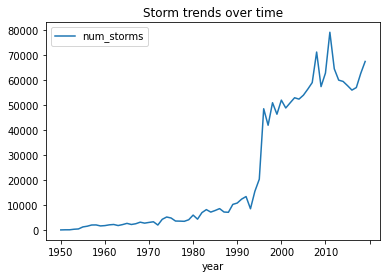

In [22]:
storm_trends.plot(title='Storm trends over time', x='year', y='num_storms')

Copyright 2020 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License